## 0. Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load the CSV Data

In [2]:
# Load the CSV data into a DataFrame
df = pd.read_csv('energy_data.csv', delimiter=';')

# Convert the DATEFROM and TIMEFROM columns into a datetime format
df['DATETIME'] = pd.to_datetime(df['DATEFROM'] + ' ' + df['TIMEFROM'])

# Display the first few rows of the dataframe
df.head()

,PROFILE,DATEFROM,TIMEFROM,VALUE,UNIT,DATETIME
0,740105,2023.03.01,00:00:00,0.880,KWH,2023-03-01 00:00:00
1,740105,2023.03.01,00:15:00,0.968,KWH,2023-03-01 00:15:00
2,740105,2023.03.01,00:30:00,0.906,KWH,2023-03-01 00:30:00
3,740105,2023.03.01,00:45:00,0.916,KWH,2023-03-01 00:45:00
4,740105,2023.03.01,01:00:00,0.977,KWH,2023-03-01 01:00:00


## 2. Cleaning the Data

In [5]:
# Step 1: Handle Missing Values
# In this case, we'll drop rows with any missing values. 
# Alternatively, you can fill missing values with df.fillna() if appropriate.
df_cleaned = df.dropna()

# Step 2: Remove Duplicates
# Assuming a combination of PROFILE, DATEFROM, and TIMEFROM uniquely identifies each record,
# we remove duplicates based on these columns.
df_cleaned = df_cleaned.drop_duplicates(subset=['PROFILE', 'DATEFROM', 'TIMEFROM'])

# Step 3: Correct Data Types
# The 'VALUE' column should be numeric. Let's ensure this.
df_cleaned['VALUE'] = pd.to_numeric(df_cleaned['VALUE'], errors='coerce')

# Handle possible conversion issues by dropping rows with NaNs in 'VALUE' after conversion.
df_cleaned = df_cleaned.dropna(subset=['VALUE'])

# Now, let's correct the datetime conversion as before but now with the cleaned data
df_cleaned['DATETIME'] = pd.to_datetime(df_cleaned['DATEFROM'] + ' ' + df_cleaned['TIMEFROM'])

# Display the first few rows of the cleaned dataframe to verify
df_cleaned.head()

## check missing datapoints



,PROFILE,DATEFROM,TIMEFROM,VALUE,UNIT,DATETIME
0,740105,2023.03.01,00:00:00,0.880,KWH,2023-03-01 00:00:00
1,740105,2023.03.01,00:15:00,0.968,KWH,2023-03-01 00:15:00
2,740105,2023.03.01,00:30:00,0.906,KWH,2023-03-01 00:30:00
3,740105,2023.03.01,00:45:00,0.916,KWH,2023-03-01 00:45:00
4,740105,2023.03.01,01:00:00,0.977,KWH,2023-03-01 01:00:00


## 3. Analyze the Data

### Total Energy Consumption

In [6]:
total_energy_consumption = df['VALUE'].sum()
print(f"Total Energy Consumption: {total_energy_consumption} KWH")

Total Energy Consumption: 864343.2250000003 KWH


### Plotting Energy Consumption Over Time for Each Profile

/var/folders/wf/pz9ng_p527bb7rssy4nht5q80000gn/T/ipykernel_52688/533460625.py:24: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/var/folders/wf/pz9ng_p527bb7rssy4nht5q80000gn/T/ipykernel_52688/533460625.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


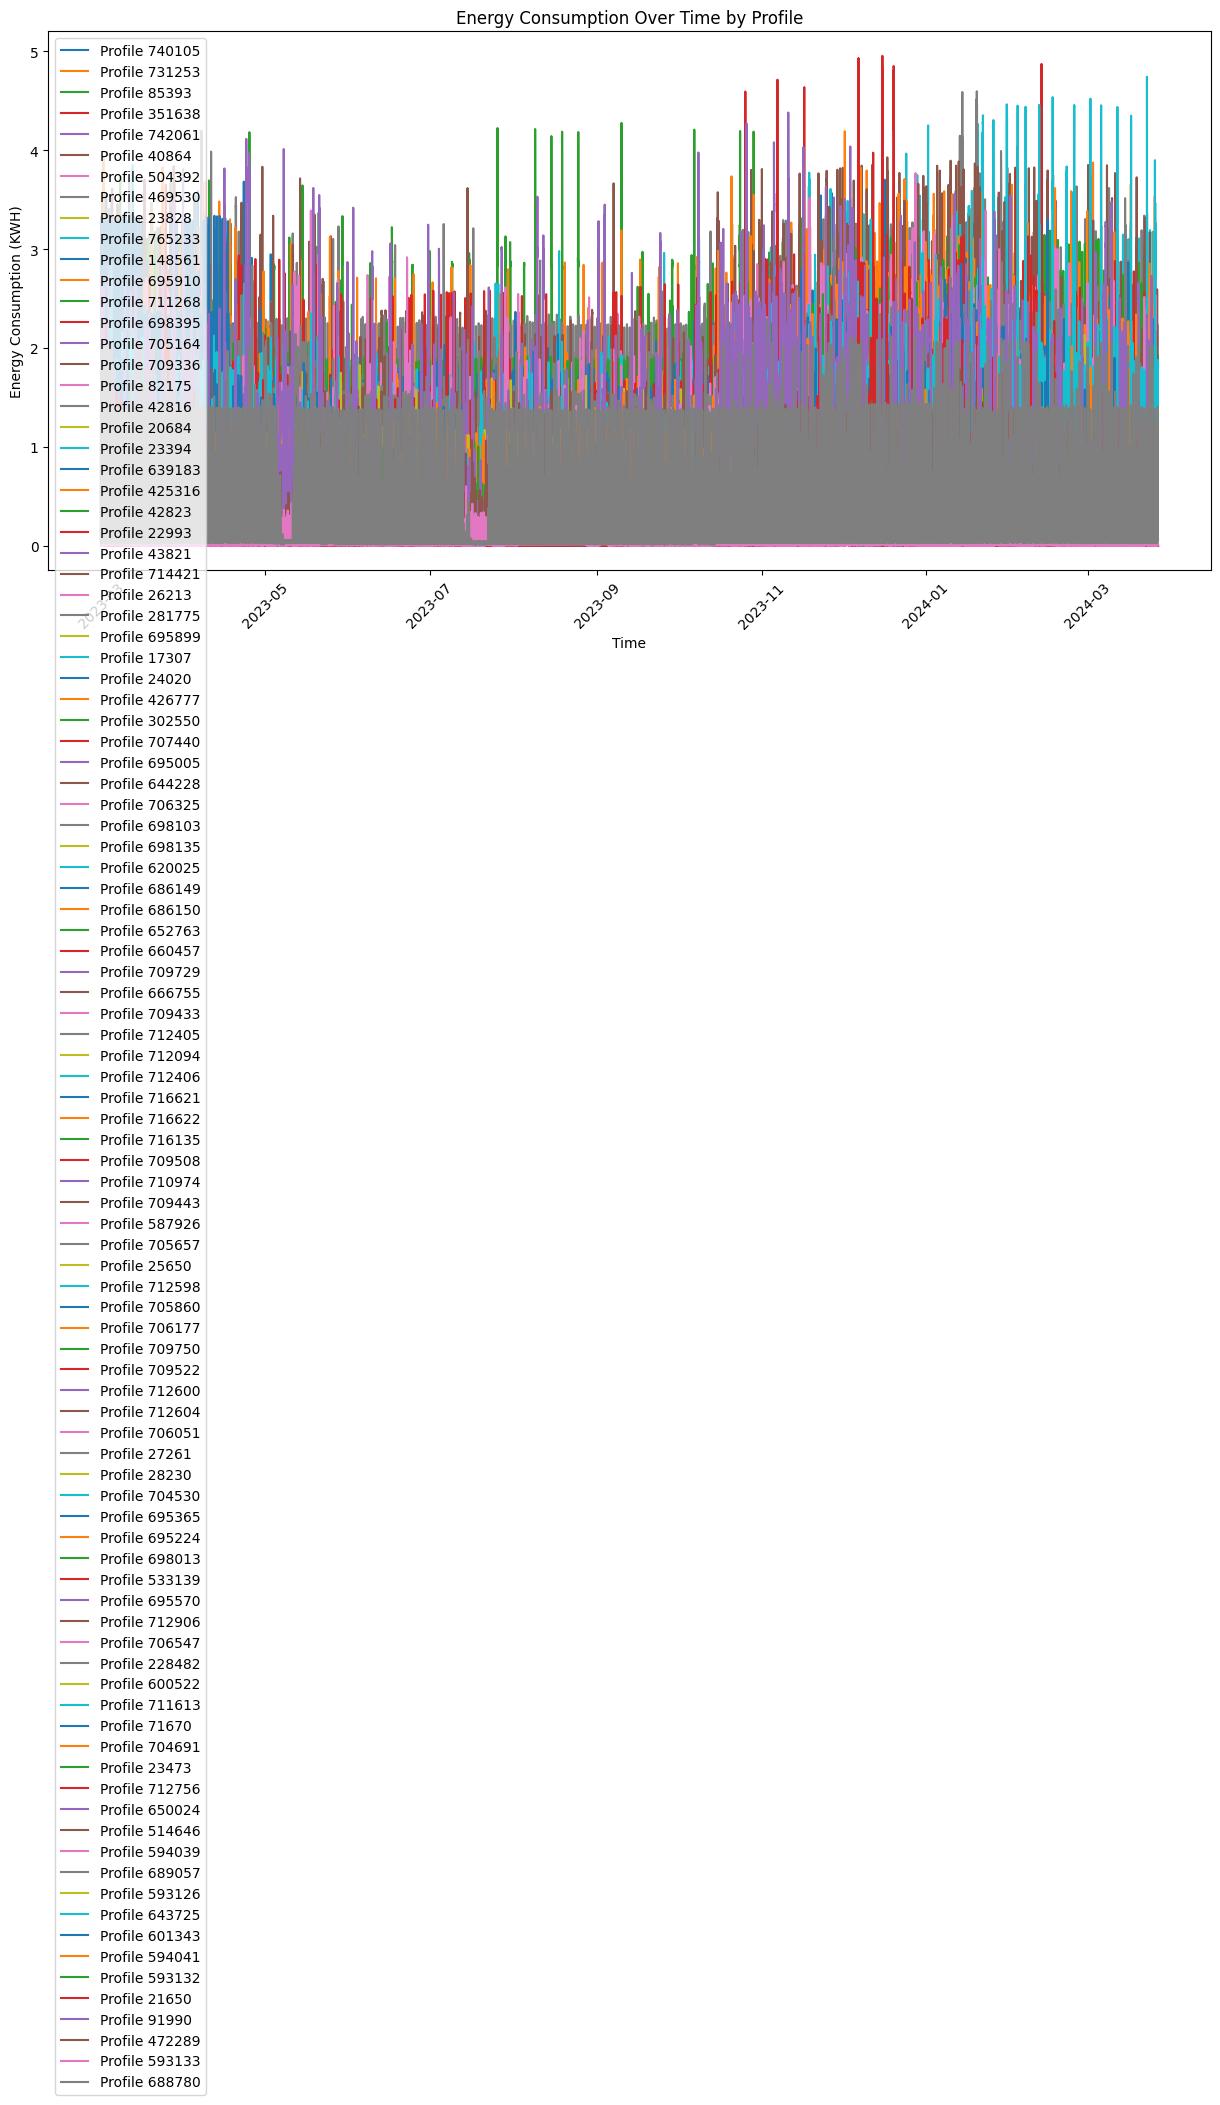

In [8]:
# Get a list of unique profiles
profiles = df_cleaned['PROFILE'].unique()

# Set up the figure size for plotting
plt.figure(figsize=(15, 7))

# Plot energy consumption over time for each profile
for profile in profiles:
    # Filter the DataFrame for the current profile
    profile_df = df_cleaned[df_cleaned['PROFILE'] == profile]
    
    # Sort by datetime just to be sure
    profile_df = profile_df.sort_values('DATETIME')
    
    # Plot
    plt.plot(profile_df['DATETIME'], profile_df['VALUE'], label=f'Profile {profile}')

# Add plot title and labels
plt.title('Energy Consumption Over Time by Profile')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (KWH)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

### Plot Energy Consumption Over Time

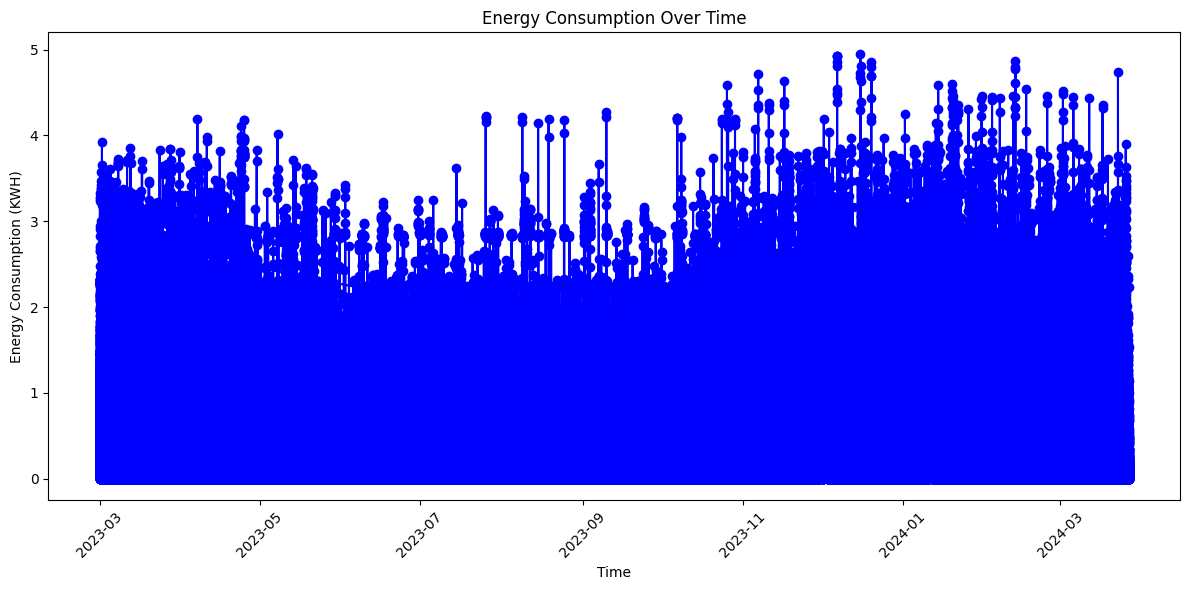

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['DATETIME'], df['VALUE'], marker='o', linestyle='-', color='b')
plt.title('Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (KWH)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()